In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('data/train_modified.csv')
test_df = pd.read_csv('data/test_modified.csv')

In [3]:
train_df_model = train_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type','Outlet_Establishment_Year'], axis = 1)
test_df_model = test_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type','Outlet_Establishment_Year'], axis = 1)

In [4]:
y =train_df_model['Item_Outlet_Sales']
x = train_df_model.drop(['Item_Outlet_Sales'], axis = 1)
x_test = test_df_model

In [5]:
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (8523, 25)
Shape of the y : (8523,)
Shape of the x Test : (5681, 25)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [7]:
# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (6818, 25)
Shape of the y Train : (6818,)
Shape of the x Valid : (1705, 25)
Shape of the y Valid : (1705,)
Shape of the x Test : (5681, 25)


# Linear Regression

In [8]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=1)
lr.fit(x_train,y_train)

#Predicting the Test set results
y_pred_lr = lr.predict(x_train)
score = r2_score(y_train,y_pred_lr)
print("Score of Training:",100*score)
print("RMSE :", np.sqrt(mean_squared_error(y_train,y_pred_lr)))

y_test_pred_lr = lr.predict(x_valid)
score = r2_score(y_valid,y_test_pred_lr)
print("Score of Testing:",100*score)
print("RMSE :" , np.sqrt(mean_squared_error(y_valid,y_test_pred_lr)))

Score of Training: 56.32787155785124
RMSE : 1126.937730271951
Score of Testing: 56.391260756719454
RMSE : 1129.7639164037737


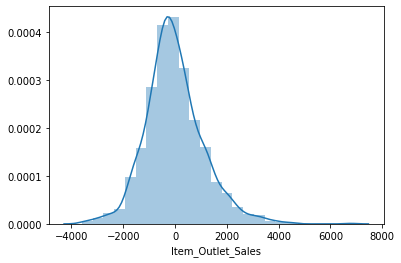

In [10]:
sns.distplot(y_valid-y_test_pred_lr, bins = 25)